# NVIDIA NeMo Framework
NVIDIA NeMo Framework is a scalable and cloud-native generative AI framework built for researchers and PyTorch developers working on Large Language Models (LLMs), Multimodal Models (MMs), Automatic Speech Recognition (ASR), Text to Speech (TTS), and Computer Vision (CV) domains. It is designed to help you efficiently create, customize, and deploy new generative AI models by leveraging existing code and pre-trained model checkpoints.

Text-to-Speech (TTS) technology involves converting written text into spoken voice output. This process enables machines to read text aloud, making it accessible for users through synthesized speech. TTS systems use natural language processing and speech synthesis techniques to generate intelligible and lifelike speech from text.

TTS have a wide range application in Voice Assistants, Customer Service, Education, ...

# Install NVIDIA NeMo Framework

```bash
apt-get update && apt-get install -y libsndfile1 ffmpeg
pip install Cython packaging
pip install nemo_toolkit['all']
```
# Nemo Tacotron2 Text-To-Speech

Tacotron2 is a state-of-the-art neural network model developed for text-to-speech (TTS) synthesis. It represents a significant advancement in generating natural-sounding speech from text, leveraging deep learning techniques to produce high-quality audio outputs. 

[NeMo I 2024-08-24 21:20:56 nemo_logging:381] Found existing object /home/levi/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2024-08-24 21:20:56 nemo_logging:381] Re-using file from: /home/levi/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2024-08-24 21:20:56 nemo_logging:381] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
[NeMo W 2024-08-24 21:21:14 nemo_logging:393] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-08-24 21:21:14 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sample_rate: 22050
      sup_data_path: null
      sup_data_types: null
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null

[NeMo I 2024-08-24 21:21:14 nemo_logging:381] PADDING: 16
[NeMo I 2024-08-24 21:21:14 nemo_logging:381] STFT using exact pad


[NeMo W 2024-08-24 21:21:14 nemo_logging:393] /home/levi/Speech-Course-Lab/env/lib/python3.11/site-packages/nemo/core/connectors/save_restore_connector.py:571: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related

[NeMo I 2024-08-24 21:21:14 nemo_logging:381] Model Tacotron2Model was successfully restored from /home/levi/.cache/torch/NeMo/NeMo_1.23.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.


[NeMo W 2024-08-24 21:21:14 nemo_logging:393] parse() is meant to be called in eval mode.


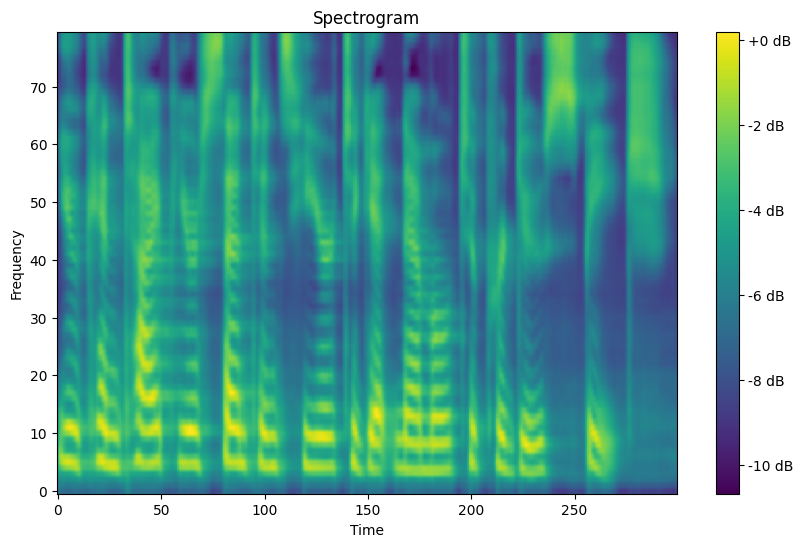

In [5]:
from nemo.collections.tts.models.base import SpectrogramGenerator
import matplotlib.pyplot as plt
spec_generator = SpectrogramGenerator.from_pretrained("tts_en_tacotron2")
# All spectrogram generators start by parsing raw strings to a tokenized version of the string
parsed = spec_generator.parse("You can type your sentence here to get nemo to produce speech.")
# Then take the tokenized string and produce a spectrogram
spectrogram = spec_generator.generate_spectrogram(tokens=parsed)

spectrogram_np = spectrogram.cpu().detach().numpy()

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(spectrogram_np[0, :, :], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()